# FYSC12 KF6 - Gamma lab - Data Analysis 

## Table of Content

* [Preparations for the lab](#prepare)
    * [Read experimental data from file](#read)
    * [Fitting Gaussians](#gaussian)
    * [Calculate Peak Area](#peak_area)
    * [Fit a line - Energy calibration](#line)
    

* [Co-60 source](#co60)
    * [Calculating peak cenroid and FWHM](#import)
    * [Calibrating NaI(Tl) and HPGe detectors](#import)
    
    
* [Na-22 source](#na22)
    * [Compton continuum discussion](#import)
    * [Calculating ratio of 1273keV $\gamma$-ray and annihilation photons ](#import)
    
    
* [Cs-137 source](#cs137)
    * [Internal conversion coefficient](#import)


* [Cf-252 source](#cf252)
    * [Deuteron binding energy](#import)
    
    
* [FWHM as a function of gamma-ray energy](#fwhm)


* [Idetifying peaks from the background radiation](#background)

    

    








## About this Notebook <a name="about"></a>

The purpose of this _jupyter_ notebook is to introduce data analysis in the
frame of gamma spectroscopy. The example programming language is _Python3_, but
of course most coding languages can do the job properly. If you have never
programmed before there are so many great tutorials available across the web.
There even exist plenty _Open Online Courses_, e.g.
https://www.coursera.org/learn/python. Please have a look around for the one
that you like the best. However, note that you do not need to be an expert in
Python to pass the lab.

The data analysis can roughly be divided into four steps:
1. Read experimental data from file.
2. Fit Gaussians to peaks.
3. Calibrate the detector response.
4. Perform a statistical analysis (e.g. error propagation) and present results.

A dedicated python library, i.e. a folder with already written code, located in
`HelpCode`, have been implemented for the data analysis connected to the labs in
FYSC12 Nuclear Physics. The folder comprises functions that support 1-3 of the
above-mentioned steps.

Full Python3 coding examples of how to perform the different steps of the data
analysis is given below. Every example is finished with a template of how the
`HelpCode`-folder can be used to perform the same calculations.

**NOTE**: It is strongly recommended that you program your own functions instead
of using the framework directly out of the book. As you will find out, there
will come a point where the framework functionalities are not to your
satisfaction, and then you need to code yourself. So, better get used to it
right away :)

## Importing python packages <a name="import"></a>

Inserting parent directory to the path such that the analysis code in `fithelpers.py`, `histhelpers.py` and `MCA.py` can be found by `python`.

In [1]:
import sys, os
sys.path.append('../')
import numpy as np
import fithelpers, histhelpers, MCA

# Preparations for the Gamma lab: <a name="prepare"></a>

In order to prepare for the lab you have to run and test code cells from the section. 

In this section of the notebook it is shown how to:
- Read experimental data from file 
- Visualize the data 
- Perform fit of the data 

## Read experimental data from file <a name="read"></a>

For an introduction on how to read and write files see e.g. http://www.pythonforbeginners.com/files/reading-and-writing-files-in-python or you could have a look at the source code in [MCA.py](../MCA.py).

### Analysis Code <a name="help1"></a>

With the `analysis_code` one can read the experimental data from one data file as follows:

In [2]:
data = MCA.load_spectrum("test_data.Spe")

`data` is an object of a class `Spectrum` and holds the channels in `x` and its content in `y` (cf. [MCA.py](../MCA.py)). See for instance: 

In [3]:
print('x = ', data.x)
print('y = ', data.y)

x =  [   0    1    2 ... 8189 8190 8191]
y =  [0. 0. 0. ... 0. 0. 0.]


### Plotting the data <a name="plot"></a>

It is always good to visualise your data. This is how you can plot and visualise it:

In [4]:
import matplotlib
# choose a backend for web applications; remove for stand-alone applications:
matplotlib.use('Agg')
# enable interactive notebook plots (
# alternative: use 'inline' instead of 'notebook'/'widget' for static images)
%matplotlib notebook

#The following line is the ONLY one needed in stand-alone applications!
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


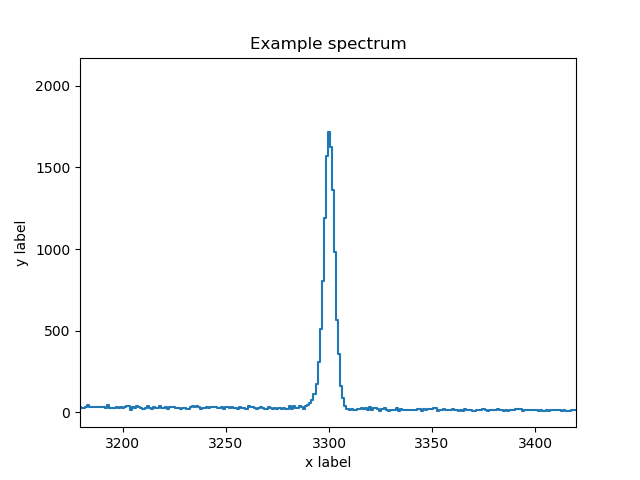

Text(0, 0.5, 'y label')

In [5]:
plt.figure()
# with the data read in with the first routine
plt.step(data.x, data.y, where='mid')

#plt.savefig("test_spectrum.png") #This is how you save the figure
plt.show()
plt.title("Example spectrum")
plt.xlabel("x label")
plt.ylabel("y label")

## Could be useful to see this in log scale..?
#plt.yscale('log')
#plt.ylim(ymin=1)

## Fit of data <a name="fit"></a>

Fitting functions can be made simply with the `scipy.optimize` module. The
function `curve_fit` does the job for you and the [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) contains
all the valuable information on how to use the function. It uses a method called
least squares which you can read about in most course literature on statistics
and for instance on [Wolfram
Alpha](http://mathworld.wolfram.com/LeastSquaresFitting.html).

### Fitting Gaussian <a name="gaussian"></a>

Read up on the Gaussian function here: [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)

The following code shows how to use the function `curve_fit` to fit a peak in
the data that was read in above (i.e. you will need to execute the above code
section before this section will work).

Estimates of (A mu sigma) = ( 1701.437969921561 3300.173963396903 2.690782635538004 )

Covariance matrix = 
 [[ 2.22927047e+02  4.29594398e-06 -2.35037636e-01]
 [ 4.29594398e-06  7.43418433e-04 -6.79408923e-09]
 [-2.35037636e-01 -6.79408923e-09  7.43418426e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 222.92704699299128 0.0007434184333430844 0.0007434184263502239 ]


<IPython.core.display.Javascript object>


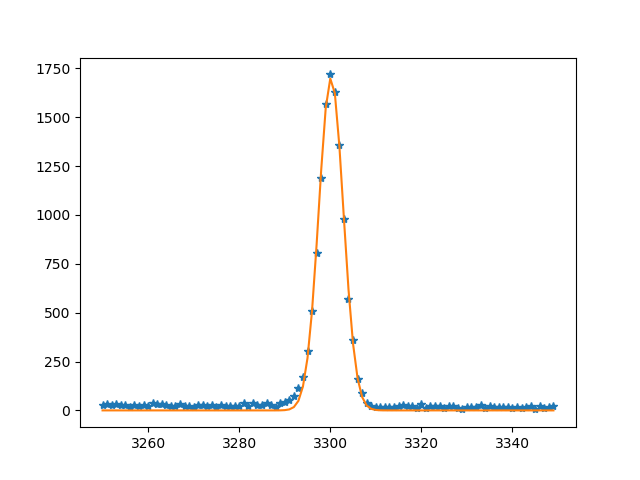

In [6]:
from scipy.optimize import curve_fit

def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

#mu = np.asarray([3300, 3750])
#E = np.asarray([1173.2, 1332.5])
mu_guess = 3300
A_guess = data.y[mu_guess]
sigma_guess = 1
guess = [A_guess, mu_guess, sigma_guess]
n = 50 #number of points on each side to include in fit

estimates, covar_matrix = curve_fit(GaussFunc,
                                    data.x[mu_guess-n:mu_guess+n],
                                    data.y[mu_guess-n:mu_guess+n],
                                    p0=guess)
A, mu, sigma = estimates[0], estimates[1], estimates[2]
print("Estimates of (A mu sigma) = (", A, mu, sigma, ")\n")

print("Covariance matrix = \n", covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", covar_matrix[0][0], covar_matrix[1][1], covar_matrix[2][2], "]" )

plt.figure()
plt.plot(data.x[mu_guess-n:mu_guess+n],data.y[mu_guess-n:mu_guess+n], linestyle="", marker="*")
plt.plot(data.x[mu_guess-n:mu_guess+n], GaussFunc(data.x[mu_guess-n:mu_guess+n], A, mu, sigma))
plt.show()

### Calculating Peak Area <a name="peak_area"></a>

There are different ways in how to calculate the area of a peak in a spectrum. The by far easiest method is to calculate the area of the fitted Gaussian function (see [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)).

In [7]:
Area = np.sqrt(2*np.pi)*A*np.abs(sigma)
print('Area of peak is: ', Area)

Area of peak is:  11475.844927499762


### Analysis code

With the analysis code:

Estimates of (A mu sigma) = ( 1701.437969921561 3300.173963396903 2.690782635538004 )

Covariance matrix = 
 [[ 2.22927047e+02  4.29594398e-06 -2.35037636e-01]
 [ 4.29594398e-06  7.43418433e-04 -6.79408923e-09]
 [-2.35037636e-01 -6.79408923e-09  7.43418426e-04]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 222.92704699299128 0.0007434184333430844 0.0007434184263502239 ]


<IPython.core.display.Javascript object>


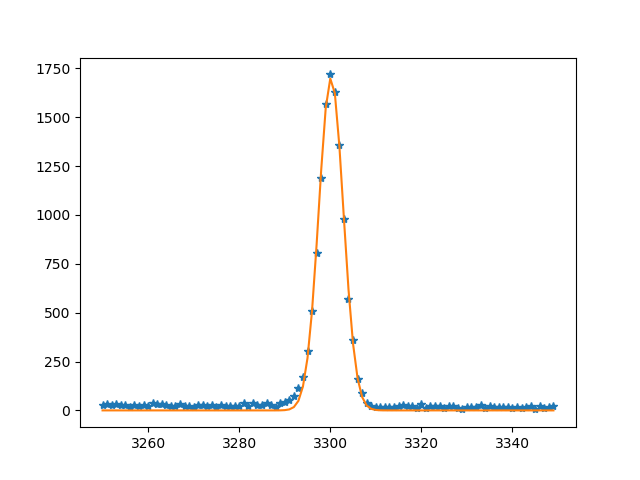

Area of peak is:  11475.844927499762


In [8]:
mu_guess = 3300
A_guess = data.y[mu_guess]
sigma_guess = 1
n = 50 #number of points on each side to include in fit

gauss = fithelpers.fit_gaussian_at_idx(data.x, data.y, mu_guess, npoints=n)
print("Estimates of (A mu sigma) = (", gauss.A, gauss.mu, gauss.sigma, ")\n")

print("Covariance matrix = \n", gauss.covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", gauss.covar_matrix[0][0], gauss.covar_matrix[1][1], gauss.covar_matrix[2][2], "]" )

plt.figure()
plt.plot(data.x[mu_guess-n:mu_guess+n], data.y[mu_guess-n:mu_guess+n], linestyle="", marker="*")
plt.plot(data.x[mu_guess-n:mu_guess+n], gauss.value(data.x)[mu_guess-n:mu_guess+n])
plt.show()

Area = np.sqrt(2*np.pi)*gauss.A*np.abs(gauss.sigma)
print('Area of peak is: ', Area)

## Statistical analysis - Error propagation<a name="stat"></a>

Background theory and instructions on how to perform statistical analysis on
experimental data, with error propagation, can be found in the document
http://www.fysik.lu.se/fileadmin/fysikportalen/UDIF/Bilder/FYSA31_KF_error.pdf, but of course also easily through a google search.

----------------------------------------------------------------------------------------------------------

# Co-60 source <a name="co60"></a>

Load spectra measured by HPGe and NaI(Tl) detectors: 

In [9]:
# Co60_HPGe = MCA.load_spectrum(#insert path of the file here)
# Co60_NaI = MCA.load_spectrum(#insert path of the file here)

In [10]:
Co60_HPGe = MCA.load_spectrum("resources/Germanium/Co-60.Spe")
Co60_NaI = MCA.load_spectrum("resources/NaI/Co-60.Spe")

### Plotting Co-60 spectra 

<IPython.core.display.Javascript object>


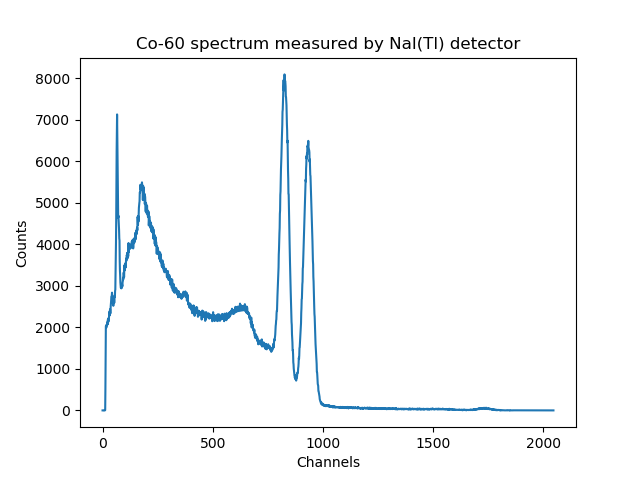

In [11]:
# Plot of Co-60 obtained by NaI 
plt.figure()
plt.plot(Co60_NaI.x, Co60_NaI.y) # plot data 
plt.title("Co-60 spectrum measured by NaI(Tl) detector")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.show()

<IPython.core.display.Javascript object>


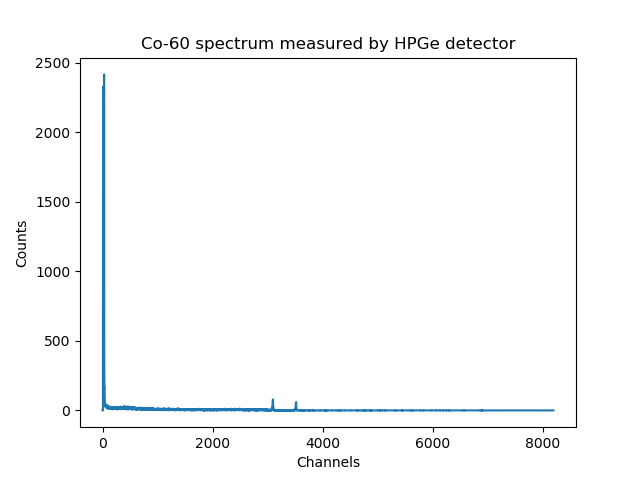

In [12]:
# Plot of Co-60 obtained by HPGe 
plt.figure()
plt.plot(Co60_HPGe.x, Co60_HPGe.y) # plot data 
plt.title("Co-60 spectrum measured by HPGe detector")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.show()


Think about following question: 
- Where are the full energy peaks on the spectra and what do they represent?
- How can we calibrate our detectors? 

### Calculating peak centroids and full width at half maximum

Calculate the peak centroids and full width at half maximum (FWHM) by the means of a Gaussian fit for Co-60 peaks for two detectors. 

Here is the code to fit one peak of Co-60 source for NaI(Tl) detector: 

In [13]:
# insert your code here .... 
# Co60_NaI_peak1 =

Estimates of (A mu sigma) = ( 7429.477064758006 826.3433191800568 25.219100529735247 )

Covariance matrix = 
 [[ 1.86856817e+04 -1.78098648e+01 -6.15275606e+01]
 [-1.78098648e+01  6.12575768e-01  3.79338668e-01]
 [-6.15275606e+01  3.79338668e-01  6.90288939e-01]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 18685.681681772905 0.6125757680931261 0.690288938762935 ]


<IPython.core.display.Javascript object>


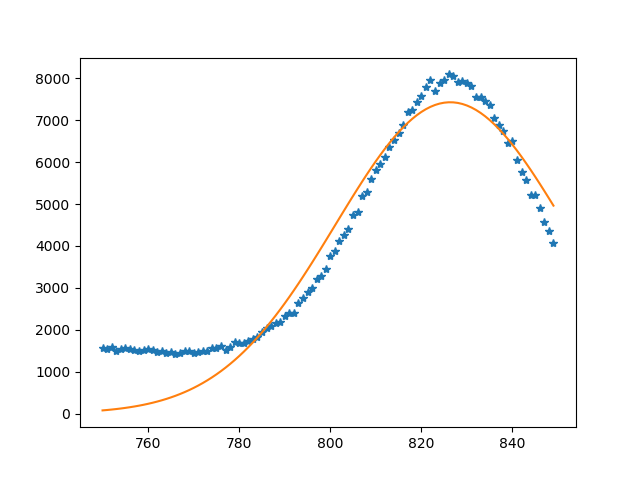

Area of peak is:  469653.7273285753


In [43]:
# mu_guess - initial guess for the peak centroid. You can find it from the plot of Co-60 spectrum
mu_guess = 800

# specify x and y values 
x = Co60_NaI.x
y = Co60_NaI.y

A_guess = data.y[mu_guess]
sigma_guess = 1
n = 50 #number of points on each side to include in fit

# Perform a Gaussian fit
Co60_NaI_peak1 = fithelpers.fit_gaussian_at_idx(x, y, mu_guess, npoints=n)

print("Estimates of (A mu sigma) = (", Co60_NaI_peak1.A, Co60_NaI_peak1.mu, Co60_NaI_peak1.sigma, ")\n")

print("Covariance matrix = \n", Co60_NaI_peak1.covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", Co60_NaI_peak1.covar_matrix[0][0], Co60_NaI_peak1.covar_matrix[1][1], Co60_NaI_peak1.covar_matrix[2][2], "]" )

plt.figure()
plt.plot(x[mu_guess-n:mu_guess+n], y[mu_guess-n:mu_guess+n], linestyle="", marker="*")
plt.plot(x[mu_guess-n:mu_guess+n], Co60_NaI_peak1.value(x)[mu_guess-n:mu_guess+n])
plt.show()


Area = np.sqrt(2*np.pi)*Co60_NaI_peak1.A*np.abs(Co60_NaI_peak1.sigma)
print('Area of peak is: ', Area)

Now find a Gaussian fit for the second Co-60 peak for the NaI(Tl) detector: 

In [15]:
# insert your code here .... 
# Co60_NaI_peak2 =

Estimates of (A mu sigma) = ( 6327.991038524407 932.5443542832725 21.43664108266218 )

Covariance matrix = 
 [[ 9.12234986e+02 -9.72261543e-03 -2.15133941e+00]
 [-9.72261543e-03  1.38963537e-02  8.23847806e-05]
 [-2.15133941e+00  8.23847806e-05  1.47473573e-02]] 

Uncertainties in the estimated parameters: 
[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = 
[ 912.2349860243286 0.013896353742162122 0.014747357269688873 ]


<IPython.core.display.Javascript object>


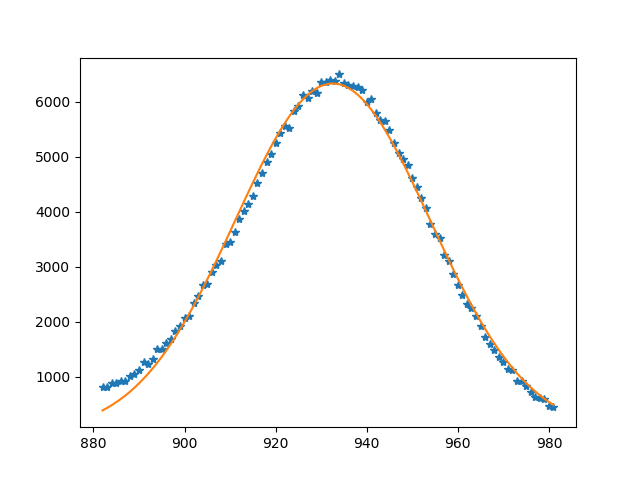

Area of peak is:  340026.3129058488


In [39]:
# mu_guess - initial guess for the peak centroid. You can find it from the plot of Co-60 spectrum
mu_guess = 932

# specify x and y values 
x = Co60_NaI.x
y = Co60_NaI.y

A_guess = data.y[mu_guess]
sigma_guess = 1
n = 50 #number of points on each side to include in fit

# Perform a Gaussian fit
Co60_NaI_peak2 = fithelpers.fit_gaussian_at_idx(x, y, mu_guess, npoints=n)

print("Estimates of (A mu sigma) = (", Co60_NaI_peak2.A, Co60_NaI_peak2.mu, Co60_NaI_peak2.sigma, ")\n")

print("Covariance matrix = \n", Co60_NaI_peak2.covar_matrix, "\n")

print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", Co60_NaI_peak2.covar_matrix[0][0], Co60_NaI_peak2.covar_matrix[1][1], Co60_NaI_peak2.covar_matrix[2][2], "]" )

plt.figure()
plt.plot(x[mu_guess-n:mu_guess+n], y[mu_guess-n:mu_guess+n], linestyle="", marker="*")
plt.plot(x[mu_guess-n:mu_guess+n], Co60_NaI_peak2.value(x)[mu_guess-n:mu_guess+n])
plt.show()


Area = np.sqrt(2*np.pi)*Co60_NaI_peak2.A*np.abs(Co60_NaI_peak2.sigma)
print('Area of peak is: ', Area)

And finally Gaussian fits for Co-60 peaks obtained from HPGe detector: 

In [17]:
# insert your code here .... 
# Co60_HPGe_peak1 =

In [18]:
# insert your code here .... 
# Co60_HPGe_peak2 =

##  Energy calibration of NaI(Tl) and HPGe detectors <a name="line"></a>

Recall that the energy calibration is the linear dependence between the ADC channel number and energies of full-energy peaks of a spectrum. It should be performed with a linear regression. Therefore, the idea behind it can be expressed as: 

\begin{equation*}
Energy = k \cdot channel + m  
\end{equation*}

where $Energy$ is characteristic $\gamma$-ray energy for a source and can be found from the KF6-RadionuclideTable-Gamma.pdf, $channel$ is a channel number that corresponds to a peak centroid of uncalibrated spectrum, $k$ and $m$ are calibration constants. 

From KF6-RadionuclideTable-Gamma.pdf or https://www.nndc.bnl.gov/nudat2/dec_searchi.jsp find energies(with uncertanties) of two characteristic gamma-rays for Co-60 source: 

In [19]:
Energy_Co60 = np.asarray([1173.228, 1332.492])
Energy_Co60_sigma = np.asarray([0.003, 0.004])

In [20]:
# Insert your values below
# Energy_Co60 = [###, ###]
# Energy_Co60_sigma = [###, ###]

Prepare values of channel numbers from the Gaussian fit you did in the previous step: 

In [21]:
# # Insert your values below
# mu_Co60_NaI = [###, ###]

In [22]:
mu_Co60_NaI = np.asarray([Co60_NaI_peak1.mu, Co60_NaI_peak2.mu])

Find calibration constants for NaI(Tl) detector: 

Estimates of (k m) = ( 1.4806920490731805 -48.50502813941518 )



/home/yulia/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


<IPython.core.display.Javascript object>


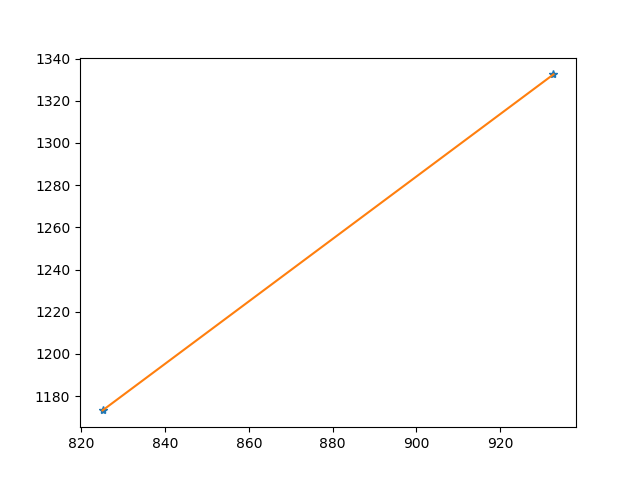

In [23]:
# Define the linear function which you want to fit.
def LineFunc(x, k, m):
    return k*x+m

# As for the Gaussian fit the function curve_fit needs a guess for the parameters to be estimated.
guess = [2, 1]

# Perform the fit
estimates_NaI, covar_matrix = curve_fit(LineFunc,
                                    mu_Co60_NaI,
                                    Energy_Co60,
                                    p0 = guess,
                                    sigma = Energy_Co60_sigma)

print("Estimates of (k m) = (", estimates_NaI[0], estimates_NaI[1], ")\n")

# plot the result
plt.figure()
plt.plot(mu_Co60_NaI, Energy_Co60, linestyle="", marker="*")
plt.plot(mu_Co60_NaI, LineFunc(mu_Co60_NaI, estimates_NaI[0], estimates_NaI[1]))
plt.show()

In [24]:
### insert your code here 

Repeat the same procedure and find calibration constants for HPGe detector: 

In [25]:
# # Insert your values below
# mu_Co60_HPGe = [###, ###]

In [26]:
### insert your code 

## Plot calibrated spectra 

Present plots of calibrated spectra for Co-60 from HPGe and NaI(Tl) detectors. Do not forget to add proper title, x and y axis labels to the plot. 

In [27]:
### insert your code here

In [28]:
### insert your code here 

----------------------------------------------------------------------------------------------------------

# Cs-137 source <a name="cs137"></a>

## Internal conversion coefficient $\alpha$ 

Determine the internal conversion coefficient ($\alpha$) for $^{137}$Ba from the measured peak intensities of the $^{137}$Cs source, i.e. the area of the peaks, of the HPGe semiconductor spectrum. Do not forget to correct for efficiency (use the following: $\varepsilon_{eff} \cdot \varepsilon_{P/T} = 0.9$ and 0.3 at x-ray energies and at 662 keV, respectively), the emission of Auger electrons (see Table T1 in the ``KF6-Attachments.pdf``) and the error analysis. Compare the obtained value with literature and discuss.

Internal conversion coefficient: 
\begin{equation*}
\alpha = \frac{\lambda_{IC}}{\lambda_\gamma} = \frac{I_{0}(x-rays)}{I_0(662keV)}
\end{equation*}

where $I_{0}(x-rays)$ and $I_0(662keV)$ are areas of the peaks  <br> 
<br> 

In [29]:
# Cs-137 source 

Load the Cs-137 data from HPGe detector: 

In [30]:
## Cs137_HPGe = 

In [31]:
Cs137_HPGe = MCA.load_spectrum("resources/Germanium/Cs-137.Spe")

Plot the spectrum: 

In [32]:
## your code goes here 

<IPython.core.display.Javascript object>


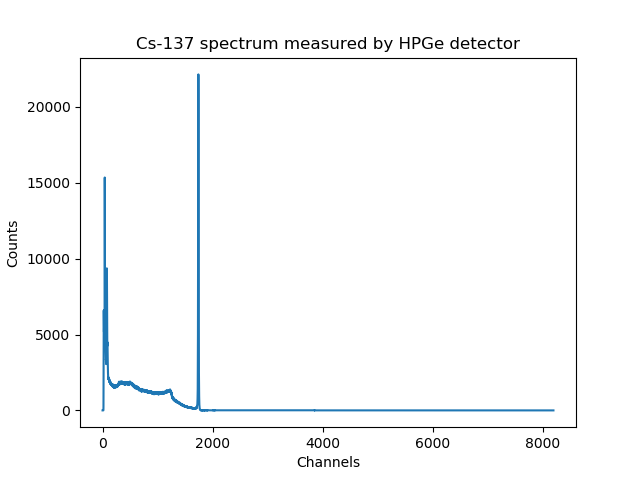

In [33]:
# Plot of Co-60 obtained by HPGe 
plt.figure()
plt.plot(Cs137_HPGe.x, Cs137_HPGe.y) # plot data 
plt.title("Cs-137 spectrum measured by HPGe detector")
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.show()


Find intensities of x- rays peaks and 662 keV peak: 

In [ ]:
## insert your code here ...

In [ ]:
## insert your code here ...

Correct your result for efficiency:

In [41]:
## insert your code here ...

Perform error propagation on your result. Compare your result with theoretical value.

In [ ]:
## insert your code here ...

----------------------------------------------------------------------------------------------------------

# Na-22 source <a name="na22"></a>

## Ratio between 1273 keV peak and photons emitted due to annihilation 

Determine the ratio between the emitted 1273 keV $\gamma$ rays and the photons emitted from the annihilation of the $\beta^+$ decay of $^{22}$Na. Do this from the measured peak intensities of the NaI(Tl) scintillator spectrum. Correct the obtained values for efficiency.

----------------------------------------------------------------------------------------------------------

# Cf-252 source <a name="cf252"></a>

## Binding energy of the deuteron 

You finally learned the features of gamma spectroscopy with interactions and detection properties. Let's use them to measure deuteron binding energy. 

 - What is the binding energy? How can it be calculated theoretically? 

- What is needed to create the deuteron in improvised experiment? Finilize the reaction: 

\begin{equation*}
? + ? = ^{2}_{1}H_{1} + ?
\end{equation*}


From the measurement of the $^{252}$Cf source (surrounded by water) with the HPGe detector determine the binding energy of the deuteron. Compare the obtained value with literature and discuss. 

In [34]:
# Your code goes here ... 

# FWHM and a $\gamma$-ray energy   <a name="fwhm"></a>

Plot the FWHM as a function of a $\gamma$-ray energy for the peaks from Na-22, Co-60 and Cs-137 spectra. 

In [35]:
# Your code goes here ... 

Discuss why are the FWHM values of the HPGe detector lower than for the NaI(Tl)?

What kind of relationship exists between the FWHM and the $\gamma$-ray energy? Refer to the book to motivate your answer. Present your results in a form of a plot with a fit of the function that represents the relationship between the FWHM and the $\gamma$-ray energy. Do not forget to include errors to the plot.  

In [36]:
# Your code goes here ... 

Finilize the comparison of HPGe and NaI detector properties: 

----------------------------------------------------------------------------------------------------------

# Analysis of background radiation <a name="background"></a>

The background spectrum that is to be analysed as a part of the lab is named
`background_analysis.csv` and can be found in the current folder. This spectrum
has been taken by a HPGe detector and is already calibrated. Read this
spectrum with the `help_code` with:

In [37]:
background_data = MCA.load_calibrated_spectrum("Background.txt")

Your task is to determine the energies of $\gamma$-rays from this background measurement and try to associate them with an isotope. Use either KF6-RadionuclideTable-Gamma.pdf) or an internet database [https://www-nds.iaea.org/xgamma_standards/](https://www-nds.iaea.org/xgamma_standards/). Present your result in a form of a table with isotopes and their $\gamma$-ray energies. Comment on the origin of the background radiation. 

In [38]:
# Plot the background spectrum and look at the peaks.
# The simpliest way to find the peaks would be zooming on the spectrum 




----------------------------------------------------------------------------------------------------------